<a href="https://colab.research.google.com/github/sitisolikahyosikarinda/DATMIN/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Nama : Siti Solikah Yosi Karinda
 NIM  : 2209116029

# Sistem Informasi A 2022

# **Analisa Resiko Kredit dalam Penyaluran Kredit Bank**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import plotly.express as px

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy import stats



##**BUSINES UNDERSTANDING**

#Business Objective

Tujuan permodelan dataset ini adalah untuk memprediksi kredit yang diberikan kepada pemohon memberi keuntungan atau kerugian bagi lembaga pemberi pinjaman.


#Assess Situation

Situasi bisnins yang mendasari analisis ini adalah bagaimana tepatnya kredit diberikan.

#Data Mining Goals

Tujuan data mining pada dataset ini adalah memprediksi pemberi pinjaman bagaimana tepatnya kredit diberikan untuk berbagai tujuan.

#Project Plan

Rencana proyek untuk menganalisis dataset dengan pengumpulan data dari sumber yang tersedia. setelah itu data dijelaskan dan di identifikasi.

##**DATA UNDERSTANDING**

#**Collect Initial Data**

Sumber dari pemodelan data yang saya ambil berasal dari kaggle dengan judul "Credit Risk Analysis for extending Bank Loans" https://www.kaggle.com/datasets/atulmittal199174/credit-risk-analysis-for-extending-bank-loans

In [ ]:
df = pd.read_csv("/content/bankloans (1).csv")

In [ ]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


#**Describe Data**

#Informasi Dasar

In [ ]:
df.shape

(1150, 9)

Pada dataset "Analisa Resiko Kredit dalam Penyaluran Kredit Bank" ini memiliki 1150 baris dan 9 kolom

#Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


In [ ]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

Pada dataset ini terdapat 9 kolom


1. Kolom "**age**" adalah kolom yang menjelaskan *** umur***  customer dengan tipe data int64

2. Kolom "**ed**" adalah kolom yang menjelaskan ***tingkat pendidikan*** customer dengan tipe data int64

3. Kolom "**employ**" adalah kolom yang menjelaskan ***pengalaman kerja ***customer dengan tipe data int64

4. Kolom "**address**" adalah kolom yang menjelaskan ***alamat*** customer dengan tipe data int64


5. Kolom "**income**" adalah kolom yang menjelaskan ***pendapatan tahunan*** customer dengan tipe data int64


6. Kolom "**debtince**" adalah kolom yang menjelaskan ***Rasio Hutang terhadap Pendapatan*** customer dengan tipe data float46


7. Kolom "**creddebt**" adalah kolom yang menjelaskan ***Rasio Kredit terhadap Hutang ***customer dengan tipe data float46

8. Kolom "**othdebt**" adalah kolom yang menjelaskan ***Hutang lainnya yang dimiliki*** customer dengan tipe data float46


9. Kolom "**default**" adalah kolom yang menjelaskan customer yang pernah ***gagal bayar di masa lalu*** (1= gagal bayar, 0=Tidak pernah gagal bayar)dengan tipe data float46



#Informasi Deskriptif

In [ ]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,700.000000
mean,35.235652,1.695652,8.781739,8.485217,47.982609,10.063391,1.605111,3.103844,0.261429
std,8.089961,0.927051,6.914762,6.977725,40.508814,6.584288,2.135967,3.529273,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.200000,0.415584,1.047996,0.000000
50%,35.000000,1.000000,7.000000,7.000000,36.000000,8.750000,0.899130,2.038053,0.000000
75%,41.000000,2.000000,13.000000,12.000000,56.750000,13.600000,1.898820,3.864960,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000




1. gae: Kolom ini memiliki rata-rata 35,24, standar deviasi (std) 8,49, dan berkisar dari minimum 20 hingga maksimum 56. Terdapat 1150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 29.000000, 50% (Quartel 2)titik data kurang dari atau sama dengan 35.000000 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 41.000000.

2. ed: Kolom ini memiliki mean 56, dengan standar deviasi (std) 1,00. Ini memiliki 1.150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 1.000000, 50% (Quartel 2)titik data kurang dari atau sama dengan 1.000000 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 2.000000.

3. employ: Kolom ini memiliki rata-rata 8,78, standar deviasi (std) 6,91, dan berkisar dari minimum 0 hingga maksimum 15. Terdapat 1150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 3.000000, 50% (Quartel 2)titik data kurang dari atau sama dengan 7.000000 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 13.000000.

4. address: Kolom ini memiliki rata-rata 2,00, deviasi standar (std) 13,00, dan berkisar dari minimum 0 hingga maksimum 22. Terdapat 1150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 3.000000, 50% (Quartel 2)titik data kurang dari atau sama dengan 7.000000 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 12.000000.

5. income: Kolom ini memiliki rata-rata 13, deviasi standar (std) 3,00, dan berkisar dari minimum 5 hingga maksimum 24. Terdapat 1.150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 24.000000, 50% (Quartel 2)titik data kurang dari atau sama dengan 36.000000 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 56.000000.

6. debtinc: Kolom ini memiliki rata-rata 6,58, deviasi standar (std) 0,10, dan berkisar dari minimum 5,2 hingga maksimum 8,75. Terdapat 1.150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 5.200000, 50% (Quartel 2)titik data kurang dari atau sama dengan 8.750000 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 13.600000.

7. creaddbt: Kolom ini memiliki rata-rata 13,60, deviasi standar (std) 1,61, dan berkisar dari minimum 0,01 hingga maksimum 35,19. Terdapat 1.150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 0.4, 50% (Quartel 2)titik data kurang dari atau sama dengan 0.9 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 0.9.

8. othdebt: Kolom ini memiliki rata-rata 1,05, deviasi standar (std) 2,04, dan berkisar dari minimum 0 hingga maksimum 35,20. Terdapat 1.150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 1.047996, 50% (Quartel 2)titik data kurang dari atau sama dengan 0.38053 dan 75 % (Ruartel 3) titik data kurang dari atau sama dengan 3.8.

9. default: Kolom ini memiliki rata-rata 1,05, deviasi standar (std) 0,00, dan berkisar dari minimum 1 hingga maksimum 1. Terdapat 1.150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 0, 50% (Quartel 2)titik data kurang dari atau sama dengan 0 dan 75 % (Ruartel 3) titik data kurang dari atau sama dengan 1.


##**Exploratory Data Analysis**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sitisolikahyosikarinda/DATMIN/main/bankloans.csv')

In [ ]:
age_counts = df['age'].value_counts()
age_counts

35    66
29    65
31    54
39    49
37    49
34    48
38    44
26    44
33    43
27    43
30    42
40    42
24    42
36    41
32    40
41    40
28    40
25    35
47    34
43    32
45    31
46    28
23    27
48    27
44    27
22    18
50    17
21    16
42    16
52    13
53     9
51     9
49     7
54     4
56     4
55     2
20     2
Name: age, dtype: int64

In [ ]:
df.groupby('age').mean().head()

,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,,,,,,,,
20,2.000000,2.000000,0.500000,15.500000,6.000000,0.122388,0.752112,0.500000
21,2.062500,1.062500,0.875000,23.875000,11.793750,0.899152,2.186410,0.300000
22,2.222222,1.055556,1.388889,20.333333,12.083333,0.785817,1.605238,0.416667
23,1.629630,2.629630,2.296296,24.074074,9.218519,0.676591,1.451297,0.555556
24,1.309524,2.904762,2.095238,21.880952,8.504762,0.632549,1.115403,0.500000


Dapat dilihat dari data tabel rata rata peminjam kredit berkisar di umur 20-24 tahun

<Axes: xlabel='age', ylabel='Count'>

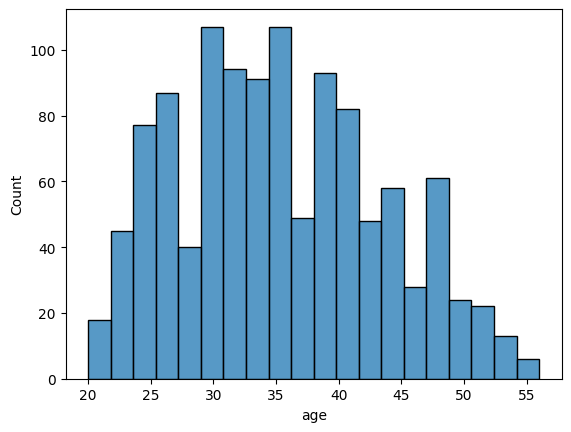

In [ ]:
sns.histplot(df['age'].dropna(), bins=20)

Grafik batang diatas menunjukan umur nasabah peminjam kredit.

In [ ]:
ed_counts = df['default'].value_counts()
ed_counts

0.0    517
1.0    183
Name: default, dtype: int64

<Axes: ylabel='default'>

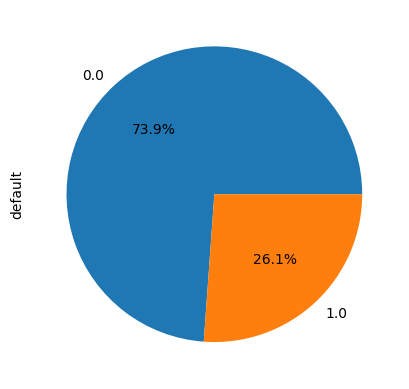

In [ ]:
umur_counts = df['default'].value_counts()
umur_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360)

Grafik lingkaran diatas menunjukan presentase customer yang pernah gagal bayar di masa lalu (default). Dengan ini dapat di simpulkan sebanyak 26.1% customer gagal bayar kredit dimasalalu

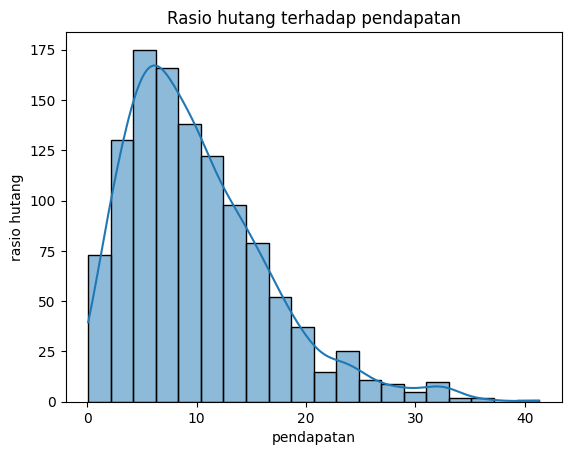

In [ ]:
sns.histplot(df['debtinc'].dropna(), bins=20, kde=True)
plt.title('Rasio hutang terhadap pendapatan')
plt.xlabel("pendapatan")
plt.ylabel('rasio hutang')
plt.show()

Bar chart diatas menunjukkan Rasio Hutang terhadap Pendapatan tidak normal




<ipython-input-18-065c5dd8c987>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ed', data=df, palette='Set2')


Text(0, 0.5, 'jumlah nasabah')

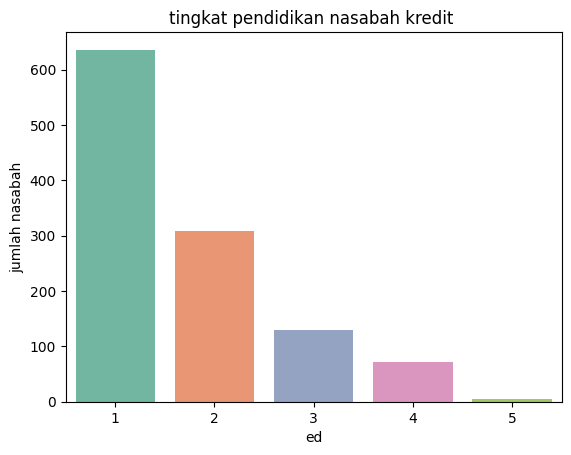

In [ ]:
sns.countplot(x='ed', data=df, palette='Set2')
plt.title('tingkat pendidikan nasabah kredit ')
plt.xlabel('ed')
plt.ylabel('jumlah nasabah')

Pada grafik batang diatas dapat dilihat nasabah kredit dengan tingkat pendidikan 1 (pertama) yang paling banyak.

Dalam beberapa visualisasi yang ditampilkan dapat ditarik kesimpulan bahwa peminjam kredit rata-rata berumur 20-24 tahun dengan tingkat pendidikan 1 (pertama) dengan presentase gagal bayar di masalalu sebesar 26.1% dimana Rasio hutang terhadap pendapatan tidak normal.

##**Verify Data Quality**

#Missing Values

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) *100, columns=['Null Ratio %'])

,Null Ratio %
age,0.000000
ed,0.000000
employ,0.000000
address,0.000000
income,0.000000
debtinc,0.000000
creddebt,0.000000
othdebt,0.000000
default,39.130435


Pada data ini hanya kolom default yang memiliki data kosong

#Outliers Values

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})


In [ ]:
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)


In [ ]:
display(results_df)

Kolom,Persentase Outliers
age,0.000000
ed,6.608696
employ,1.565217
address,2.521739
income,7.130435
debtinc,2.782609
creddebt,8.608696
othdebt,7.652174
default,0.000000


Ada 4 data yang tergolong outliers dimana kolom 0 memiliki 1% outliers kolom 1 memiliki 2% outliers dan kolom 2 memiliki 1% outliers

#Duplicated Values

In [ ]:
df[df.duplicated()]

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
850,36,1,16,13,32,10.9,0.544128,2.943872,NaN
851,50,1,6,27,21,12.9,1.316574,1.392426,NaN
852,40,1,9,9,33,17.0,4.880700,0.729300,NaN
853,31,1,5,7,23,2.0,0.046000,0.414000,NaN
854,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


Berdasarkan hasil analisis diatas dapat kita tarik kesimpulan bahwa data tersebut memiliki kualitas yang cukup baik dikarenakan hanya ada satu kolom dengan data kosong dan sedikit data yang terduplikasi.

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang  bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [ ]:
print((df.isna().sum() / len(df)) * 100)

age          0.000000
ed           0.000000
employ       0.000000
address      0.000000
income       0.000000
debtinc      0.000000
creddebt     0.000000
othdebt      0.000000
default     39.130435
dtype: float64


In [ ]:
df[df['default'].isnull()]

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


#####**Imputasi Missing Values**

Untuk kolom ***default***, perlu kita lakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik kolom ***default***

In [ ]:
df['default'].dropna().describe()

count    700.000000
mean       0.261429
std        0.439727
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: default, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom ***default*** untuk imputasi nilai kosong tersebut

#####**Pengecekkan Ulang**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
age,0.000000
ed,0.000000
employ,0.000000
address,0.000000
income,0.000000
debtinc,0.000000
creddebt,0.000000
othdebt,0.000000
default,39.130435


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [ ]:
df[df.duplicated()]

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
850,36,1,16,13,32,10.9,0.544128,2.943872,NaN
851,50,1,6,27,21,12.9,1.316574,1.392426,NaN
852,40,1,9,9,33,17.0,4.880700,0.729300,NaN
853,31,1,5,7,23,2.0,0.046000,0.414000,NaN
854,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


#####**Hapus Nilai Duplikat**

In [ ]:
df = df.drop_duplicates()

menghapus nilai duplikat

In [ ]:
df[df.duplicated()]

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default


###**Penanganan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Menampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.000000
ed,6.352941
employ,1.176471
address,2.235294
income,6.235294
debtinc,2.470588
creddebt,8.117647
othdebt,7.176471
default,0.000000


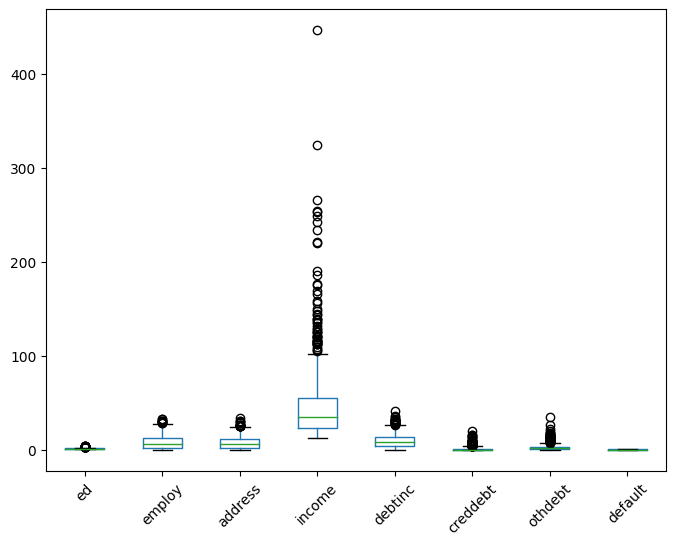

In [ ]:
boxplot = df.drop('age', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [ ]:
def categorize_agee(age):
  if age < 30:
    return 'Dua Puluhan'
  elif 30 <= age < 40:
    return 'Tiga Puluhan yang Luar Biasa'
  elif 40 <= age < 60:
    return 'Paruh Baya'
  else:
    return 'Lansia'
df['AgeCategory'] = df['age'].apply(categorize_agee)


<ipython-input-51-4e277a4a01f4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeCategory'] = df['age'].apply(categorize_agee)


In [ ]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,AgeCategory
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,Paruh Baya
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,Dua Puluhan
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,Paruh Baya
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,Paruh Baya
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,Dua Puluhan


menambahkan fitur baru yaitu "AgeCategory" untuk mengelompokan golongan umur.

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df = df.drop([ 'address', 'othdebt', 'creddebt' ], axis=1)

Kolom "address", "othdebt", dan "creddebt" dirasa kurang relevan karena

***Kolom "address" (alamat)***
Kolom ini tidak memberikan informasi langsung tentang kemampuan kredit customer.

Data alamat mungkin sulit diverifikasi dan dianalisis.


***Kolom "othdebt" (Hutang lainnya yang dimiliki)***
Kolom ini sudah terwakili oleh kolom "debtince" (Rasio Hutang terhadap Pendapatan) yang lebih informatif.

***Kolom "creddebt" (Rasio Kredit terhadap Hutang)***
Kolom ini memiliki kesamaan dengan "debtince"



###**Pengecekkan Hasil**

In [ ]:
df.head()

,age,ed,employ,income,debtinc,default,AgeCategory
0,41,3,17,176,9.3,1.0,Paruh Baya
1,27,1,10,31,17.3,0.0,Dua Puluhan
2,40,1,15,55,5.5,0.0,Paruh Baya
3,41,1,15,120,2.9,0.0,Paruh Baya
4,24,2,2,28,17.3,1.0,Dua Puluhan


#**Data Transformation**

###**Mapping**

In [58]:
df['AgeCategory'] = df['AgeCategory'].map({'Paruh Baya': 0, 'Dua Puluhan': 1,'Tiga Puluhan yang Luar Biasa': 2}).astype(int)

In [59]:
df

,age,ed,employ,income,debtinc,default,AgeCategory
0,41,3,17,176,9.3,1.0,0
1,27,1,10,31,17.3,0.0,1
2,40,1,15,55,5.5,0.0,0
3,41,1,15,120,2.9,0.0,0
4,24,2,2,28,17.3,1.0,1
...,...,...,...,...,...,...,...
845,34,1,12,32,2.7,NaN,2
846,32,2,12,116,5.7,NaN,2
847,48,1,13,38,10.8,NaN,0
848,35,2,1,24,7.8,NaN,2


mengubah kolom yang memiliki data non numerik menjadi numerik, pada kasus ini saya mengubah tipe data dari kolom "AgeCategory" menjadi numerik

###**Encoding**

In [60]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [61]:
df.head()

,age,ed,employ,income,debtinc,default,AgeCategory
0,41,3,17,176,9.3,1.0,0
1,27,1,10,31,17.3,0.0,1
2,40,1,15,55,5.5,0.0,0
3,41,1,15,120,2.9,0.0,0
4,24,2,2,28,17.3,1.0,1
